# Big Green Men - CMPINF 0010 Final Project
## The Greenest & Cleanest Neighborhood

When deciding how we should choose the "Best Neighborhood in Pittsburgh," we quickly thought of how miserable it would be to live in a dirty neighborhood with little-to-no greenery. No normal person would want to live in filth. Considering this, we decided to choose datasets covering trash collection, technologically/visually smart trash cans, and green spaces in Pittsburgh. The cleanest and greenest neighborhood in Pittsburgh would, no doubt, have plenty of smart trash collection sites and containers and lots of open green space for recreational activities and events.

Here are our datasets:
- Operation Green Spaces = https://data.wprdc.org/dataset/cd9ae013-5b93-43d6-8793-bccf10f12c72/resource/b06fa202-ead7-491c-b8f6-2702dd35f8dd/download/opendata-pubworks-operations-green-spaces-2015.csv
- Smart Trash Containers = https://data.wprdc.org/datastore/dump/75b83ac9-8069-4cf1-bcc3-b9e6b04487d9
- Waste Recovery Locations = https://data.wprdc.org/datastore/dump/51f0c4f3-0ddd-4073-8f39-ad19d7528575

In order to find the greenest and cleanest neighborhood in Pittsburgh, we decided to search each neighborhood by the amount of green spaces present in each neighborhood as well as how easy it is throw away trash and how smart the trash cans are. To find this relevant data, we used data
sets on Operation Green Spaces, Smart Trash Containers, and Waste Recovery Locations.


First, let's import everything from pandas and matplotlib and read through all of the datasets to ensure that everything works as intended. For the datasets, we can simply use pd.read_csv.

In [1]:
#Import necessary tools
import pandas as pd
import geopandas
import numpy as np
import math
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

#Read through OperationGreenSpaces dataset
greenSpaces = pd.read_csv("OperationGreenSpaces.csv")

With that out of the way, it's finally time to cover our submetrics and datasets!

## Evan's Sub-metric: Operation Green Spaces

The following visual is a portion of the Operation Green Spaces dataset. It lists the acreage, facility (name of green space), and features of each green space. The most important pieces of data in this dataset are their acreage and assigned neighborhoods. Much of the code following this visual relies heavily on those two things.

In [5]:
greenSpaces.head()

,Responsibility_Parks or Operations,Facility,Division,Total Acreage,Maintainable Acreage,Shelter,Rec Center,Senior Center,Pool,Spray Pool,...,Grandstand,Control Link for Basketball Courts,Control Link for Tennis Court,Control Linkl for Hockey Court,Dek Hockey Court,Dog Park,Spray Park,Ownership of Facility,Benches,Tables
0,Operations,Bates St Triangle,3.0,0.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN
1,Operations,Baum Negley Triangle,2.0,0.2,NaN,NaN,0.0,0.0,NaN,NaN,...,NaN,No,No,No,NaN,NaN,NaN,NaN,0.0,0.0
2,Operations,Bedford Strip,3.0,0.3,NaN,NaN,0.0,0.0,NaN,NaN,...,NaN,No,No,No,NaN,NaN,NaN,NaN,0.0,0.0
3,Operations,Beechview Monument,5.0,0.1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,No,No,No,NaN,NaN,NaN,NaN,2.0,NaN
4,Operations,Brookline Monument,4.0,0.1,NaN,NaN,0.0,0.0,NaN,NaN,...,NaN,No,No,No,NaN,NaN,NaN,NaN,0.0,0.0



### Part 1: Green Space Count

For this sub-metric, we'll first need to figure out exactly how many green spaces each neighborhood has within the Operation Green Spaces dataset. To do this, I created an enhanced for loop to through all the rows in the dataset while picking out each item in the **Neighborhood** column and adding that item to a dictionary. If that item is already in the dictionary, the integer coorespnding to the neighborhood in the dictionary increases by one. In essence, this enhanced for loop counts how many times a neighborhood appears in the dataset and adds that to the dictionary.

In [6]:
#Dictionary for neighborhood counts
spaceNum_dict = dict()

#Iterate through dataframe
for n in range(len(greenSpaces)):
    #Find and store neighborhood in dataset
    val = greenSpaces.loc[n, 'Neighborhood']
    
    #Test if the neighborhood/val is in dict
    if val in spaceNum_dict:
        #If val exists in dict, increase count by 1
        spaceNum_dict[val] += 1
    else:
        #If val doesn't exist in dict, set count to 1
        spaceNum_dict[val] = 1

Then, in order to easily manipulate the data in the dictionary,  I converted the dictionary to a series. This new series will be used for all of the subsequent code associated with the number of green spaces within each neighborhood. As an example, the following list shows each neighborhood in the dataset and how many green spaces correspond with said neighborhood.

In [7]:
spaceNum_series = pd.Series(spaceNum_dict, name = "Green Space")
spaceNum_series.sort_values(ascending=False)

East Liberty                 6
Point Breeze                 5
Central Business District    4
Central Oakland              3
South Oakland                2
NaN                          2
Point Breeze North           2
Squirrel Hill South          2
Swisshelm Park               2
Crawford Roberts             1
Beechview                    1
Brookline                    1
North Oakland                1
Polish Hill                  1
Regent Square                1
Sheraden                     1
Name: Green Space, dtype: int64

According to the list above, East Liberty has the highest number of green spaces out of all the neighborhoods in the dataset. The top four (East Liberty, Point Breeze, Central Business District, and Central Oakland) are noticable outliers as the majority of the neighborhoods listed above have two green spaces, at most.

Below are a couple more representations of the data above: bar chart & pie chart.

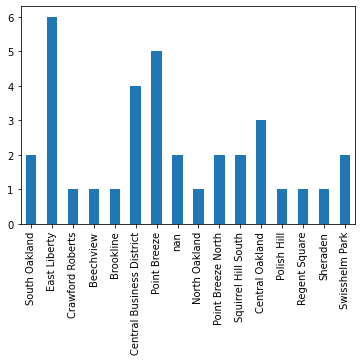

In [8]:
spaceNum_series.plot.bar()

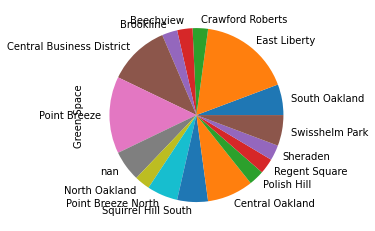

In [9]:
spaceNum_series.plot.pie()

With these two charts, it's much easier to separate the top four neighborhoods, as mentioned before, from the rest of the data. Using the pie chart, it appears that East Liberty, the neighborhood with the most green spaces, contains about 1/6 of all the green spaces in the dataset. Point Breeze, with the second most green spaces, seems to take up about 1/7 of all the green spaces.

### Part 2: Total Acreage

Next, let's take a look at the total acreage of green space in each neighborhood. This seemed like the most logical next step in my analysis of this dataset because relying on only the number of green spaces in each neighborhood to determine the cleanest & greenest neighborhood would be misleading. What if a neighborhood had less green spaces but more total acreage of green space because its green spaces were much larger than the ones in East Liberty? Wouldn't that neighborhood be the victor over East Liberty?

This was an important question that needed answering, so I grouped the original data into a smaller dataset listing only each neighborhood and the sum of their corresponding acreages for each green space. The results were quite surprising.

In [3]:
#Displays total acreage of all green spaces in each neighborhood
acreSum = greenSpaces.groupby("Neighborhood")['Total Acreage'].sum()
acreSum.sort_values(ascending=False)

Neighborhood
East Liberty                 4.15
Central Oakland              1.70
Point Breeze North           1.40
Central Business District    1.24
Point Breeze                 1.12
Squirrel Hill South          0.40
South Oakland                0.30
Crawford Roberts             0.30
Beechview                    0.10
Brookline                    0.10
North Oakland                0.10
Sheraden                     0.10
Swisshelm Park               0.05
Polish Hill                  0.01
Regent Square                0.01
Name: Total Acreage, dtype: float64

To my surprise, East Liberty came out on top again. I originally thought that one of the neighborhoods lower on the green space count list, such as Squirrel Hill South, would have higher total acreage to make up for the small number of green spaces. These results may, of course, be the result of missing data that would otherwise completely change the results. I am, however, strictly working with this dataset.

The following are a couple more visuals of the list above.

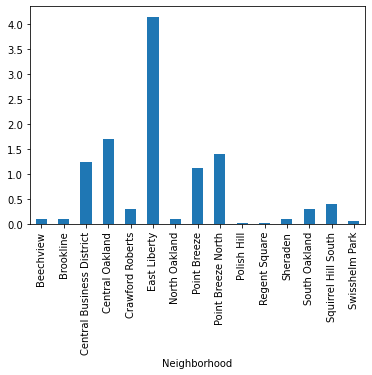

In [4]:
acreSum.plot.bar()

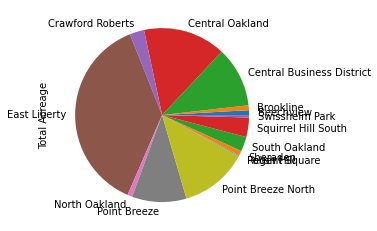

In [5]:
acreSum.plot.pie()

East Liberty, unsurprisingly, makes up over 1/3 of the total acreage of all the green spaces in the dataset, seeing as it has 3.45 acres more than Central Oakland's 1.70 acres, which is in second place. So, considering how well it performed in both the green space count and total acreage parts of the sub-metric, i think it's safe to say that East Liberty takes the cake for the green spaces sub-metric by a landslide.

On another note, did you know that Squirrel Hill South has 375 grills in its only green space recorded in the dataset?

In [6]:
#Displays the total amount of grills present in all green spaces in each neighborhood
grillSum = greenSpaces.groupby("Neighborhood").sum()['Grill']
grillSum.sort_values(ascending=False)

Neighborhood
Squirrel Hill South          375.0
Beechview                      0.0
Brookline                      0.0
Central Business District      0.0
Central Oakland                0.0
Crawford Roberts               0.0
East Liberty                   0.0
North Oakland                  0.0
Point Breeze                   0.0
Point Breeze North             0.0
Polish Hill                    0.0
Regent Square                  0.0
Sheraden                       0.0
South Oakland                  0.0
Swisshelm Park                 0.0
Name: Grill, dtype: float64

<h2>Aaron's Sub-metric 1: Use of Smart Trash Containers <h2>

Smart trash containers are a good way to see what neighborhood is the greenest, cleanest, and best to live in.

In [2]:
data = pd.read_csv("SmartTrashContainers.csv")

data = data[["container_id", "address", "neighborhood"]][:10]
data.head(10)

,container_id,address,neighborhood
0,1,122 E North Ave,Central Northside
1,2,2507 Brighton Rd,Marshall-Shadeland
2,3,1300 Federal St,Central Northside
3,4,110 Federal St,Allegheny Center
4,5,490 E North Ave,Central Northside
5,6,1501 Brighton Rd,California-Kirkbride
6,7,3113 Brighton Rd,Marshall-Shadeland
7,8,1729 Brighton Rd,California-Kirkbride
8,9,710 W North Ave,Allegheny Center
9,10,919 Fulton St,Manchester


Above are the first 10 Smart Containers in the data set, to show what data is being used from the data set.

In [4]:
absoluteTrash = pd.read_csv("SmartTrashContainers.csv", usecols = ["neighborhood", "container_id"])
absoluteTrash = absoluteTrash.sort_values("neighborhood")
absoluteTrash.dropna(inplace = True)
absoluteTrash

,container_id,neighborhood
41,42,Allegheny Center
256,289,Allegheny Center
3,4,Allegheny Center
78,83,Allegheny Center
27,28,Allegheny Center
...,...,...
764,879,Westwood
767,882,Westwood
297,338,Westwood
792,911,Westwood


In [5]:
items = ["Allegheny Center", "Allegheny West", "Allentown", "Arlington", "Banksville", "Bedford Dwellings", "Beechview", "Beltzhoover", "Bloomfield", "Bluff",  "Brighton Heights", "Brookline",  "Carrick", "Central Lawrenceville",  "Central Oakland",  "Chateau", "Crafton Heights", "Crawford-Roberts","Duquesne Heights", "East Allegheny", "East Carnegie", "East Hills", "East Liberty", "Elliott",  "Fineview", "Friendship", "Garfield", "Greenfield",  "Hazelwood", "Highland Park", "Homewood North", "Homewood South", "Homewood West", "Knoxville", "Larimer", "Lincoln-Lemington-Belmar", "Lincoln Place", "Lower Lawrenceville", "Manchester", "Marshall-Shadeland", "Middle Hill", "Morningside",  "Mount Washington",  "North Oakland", "North Shore", "Northview Heights", "Oakwood",  "Perry North", "Perry South", "Point Breeze", "Point Breeze North", "Polish Hill", "Regent Square",  "Shadyside", "Sheraden", "South Oakland", "South Shore", "South Side Flats", "South Side Slopes", "Spring Garden", "Spring Hill-City View", "Squirrel Hill North", "Squirrel Hill South", "St. Clair", "Stanton Heights", "Strip District",  "Swisshelm Park", "Terrace Village", "Troy Hill", "Upper Hill", "Upper Lawrenceville", "West End", "West Oakland",  "Windgap"]

In [6]:
for item in items:
    val_count = absoluteTrash['neighborhood'].value_counts()[item]
    print(item, val_count)
    #print(val_count)
   ## if item :
     #   item =

Allegheny Center 7
Allegheny West 15
Allentown 9
Arlington 3
Banksville 2
Bedford Dwellings 1
Beechview 8
Beltzhoover 3
Bloomfield 58
Bluff 28
Brighton Heights 24
Brookline 17
Carrick 38
Central Lawrenceville 29
Central Oakland 34
Chateau 5
Crafton Heights 8
Crawford-Roberts 21
Duquesne Heights 3
East Allegheny 26
East Carnegie 1
East Hills 2
East Liberty 68
Elliott 12
Fineview 3
Friendship 12
Garfield 7
Greenfield 14
Hazelwood 18
Highland Park 12
Homewood North 4
Homewood South 28
Homewood West 2
Knoxville 7
Larimer 20
Lincoln-Lemington-Belmar 6
Lincoln Place 7
Lower Lawrenceville 29
Manchester 6
Marshall-Shadeland 17
Middle Hill 28
Morningside 8
Mount Washington 25
North Oakland 14
North Shore 53
Northview Heights 1
Oakwood 1
Perry North 15
Perry South 12
Point Breeze 12
Point Breeze North 2
Polish Hill 13
Regent Square 9
Shadyside 76
Sheraden 16
South Oakland 7
South Shore 1
South Side Flats 51
South Side Slopes 8
Spring Garden 3
Spring Hill-City View 5
Squirrel Hill North 22
Squirr

The code above goes through the list of nieghborhoods in Pittsburgh, and prints out how many smart trash containers are in each neighborhood.

According to the data, the neighborhood with the most Smart Trash Containers is  Shady Side with 76,then East Liberty with 68, followed by Squirrel Hill South with 63, and then Bloomfield with 58. 5th place is North Shore with 53, and then South Side Flats with 51

<h2>Aaron's Sub-metric 2: Waste Recovery Locations

In [7]:
wastedata = pd.read_csv("WasteRecoveryLocations.csv")
wastedata = wastedata.loc[:, ["name", "city", "neighborhood", "latitude", "longitude"]]

wastedata.head(25)

,name,city,neighborhood,latitude,longitude
0,ABC - EX Transfer Station,Stowe Twp,NaN,40.477093,-80.064937
1,Advance Auto Parts - Babcock Blvd,Shaler Twp,NaN,40.497270,-79.978461
2,Advance Auto Parts - East Liberty,Pittsburgh,East Liberty,40.464459,-79.924964
3,Advance Auto Parts - Etna,Etna,NaN,40.500734,-79.943943
4,Allegheny County Health Department,Pittsburgh,Lower Lawrenceville,40.465420,-79.959001
5,Appliance Warehouse,Pittsburgh,South Side Flats,40.429444,-79.994381
6,Batteries Plus Bulbs - North Hills,Ross Twp,NaN,40.525004,-80.005021
7,Batteries Plus Bulbs - Robinson,North Fayette Twp,NaN,40.450154,-80.183213
8,Best Buy - Homestead,NaN,NaN,40.412447,-79.903348
9,Best Buy - North Hills,NaN,NaN,40.523234,-80.006625


The data set I used has some locations that are not in Pittsburgh. I filtered them out and printed all of the Waste Recovery Locations that are in the city of Pittsburgh. I us Above, they are listed in no particular order, just by the natural order that the data set was listed. I only showed about half of the values, in actuality there's around 50

In [8]:
wastedata = wastedata.sort_values("neighborhood")
wastedata.dropna(inplace = True)
wastedata

,name,city,neighborhood,latitude,longitude
38,Beltzhoover McKinley Skate Park - Off Bausman St,Pittsburgh,Beltzhoover,40.412054,-80.002888
13,City-County Building Drop Box,Pittsburgh,Central Business District,40.437980,-79.996931
43,Salvation Army - Allegheny Center,Pittsburgh,Central Northside,40.455408,-80.007736
47,West Penn Laco,Pittsburgh,Chateau,40.453807,-80.032753
33,MedReturn - Medication Drop Box,Pittsburgh,Chateau,40.450500,-80.021571
25,Goodwill - East Allegheny,Pittsburgh,East Allegheny,40.453360,-80.000141
2,Advance Auto Parts - East Liberty,Pittsburgh,East Liberty,40.464459,-79.924964
30,Home Depot - East Liberty,Pittsburgh,East Liberty,40.465139,-79.922222
45,Target - East Liberty,Pittsburgh,East Liberty,40.460870,-79.921501
39,Public Works 5th Division,Pittsburgh,Elliott,40.439500,-80.046521


I used sort.data to sort the data into alphabetically by neighborhood, and also filtered out anything that wasn't Pittsburgh

In [9]:
items = ["Beltzhoover", "Central Business District", "Central Northside", "Chateau", "East Allegheny", "East Liberty", "Greenfield", "Hazelwood", "Homewood West", "Lincoln-Lemington-Belmar", "Lower Lawrenceville", "Point Breeze North", "Shadyside", "South Side Flats", "Squirrel Hill South", "Strip District", "Upper Lawrenceville"]

In [10]:
for item in items:
    val_count = wastedata['neighborhood'].value_counts()[item]
    print(item, val_count)

Beltzhoover 1
Central Business District 1
Central Northside 1
Chateau 2
East Allegheny 1
East Liberty 3
Greenfield 1
Hazelwood 1
Homewood West 1
Lincoln-Lemington-Belmar 1
Lower Lawrenceville 1
Point Breeze North 3
Shadyside 4
South Side Flats 6
Squirrel Hill South 1
Strip District 2
Upper Lawrenceville 1


According to the data set, and the metric being how many Waste Recovery Locations a neighborhood has, the best neighborhood to live in is South Side Flats, with 6 Waste Recovery Locations, followed by Shadyside with 4 Waste Recovery Locations, and then East Liberty and Point Breeze North, both with 3 Waste Recovery Locations.

## Conclusions

### Evan

Prior to finishing this project, I was sure that Squirrel Hill South would be the best neighborhood in terms of green spaces. After reviewing all of that data, however, I found that East Liberty had both the most number of green spaces and acreage of green space. Despite this overwhelming victory for East Liberty on my end and after reviewing Aaron's side of the project, I believe that either East Liberty or South Side Flats are the cleanest and greenest neighborhood in Pittsburgh. Seeing as my dataset was rather small compared to his and that I think cleanliness based on trash disposal and collection is more important than greenness through green spaces, I feel a bit stuck between East Liberty and South Side Flats.

### Aaron

According to the 2 metrics that I did, the best neighborhood in Pittsburgh in terms of how green it is would be South Side Flats. South Side Flats has the most Waste Recovery Locations with 6, and the 4th most Smart Trash Containers with 51.